### PHASE 3 PROJECT
##### SUBMISSION
* Student name: LESLEY WANJIKU KAMAMO
* Student pace: PART TIME
* Scheduled project review date/time: 23RD OCTOBER 2023
* Instructor name: SAMUEL KARU

## Overview
Financial freedom is what everyone in the employment industry aims to achieve. I tend to think the base for this is in the education system. More than the need to acquire knowledge, we go through the education system so as to give back to the community through work/employment. For the skilss learnt, we aim that one point in time, it will yield to financial freedom in whatever industry and phase we choose to place ourselves in.

Soar High Research Agency is an non-governmental organization that deals with social development. They are looking for an industry to invest that will yield return even in the future. Based on their source question, we are required to provide insights on the wealth distribution status and industries they are to investment in.

For this project, we are going to be solving a classification problem using the Billionaire Statistis dataset chosen.

## Business Problem


#### Objectives
The objectives of this project based on the dataset chosen is to find out:
1. The Wealth Status of Billionaires (whether self-made or not)
2. What industry/sources is more inclined to produce billionaires?
3. Demographic analysis of billionaires (age, gender, country)
4. Provide classification to the wealth status of billionaires based on the features.
5. Provide insights into which industry are likely to produce billionaires in future (logistic regression)


## Data Understanding

For this project, we will use the data under the file path `data/...`. This folder contains the information on billionaires. The dataset represents historical data on billionaires for recent past years, hence this data will be modified for the purpose of the analysis.

### Data Description
The data is contained in a CSV file:
1. `Billionaires Statistics Dataset.csv`: each record represents rank,finalWorth,category,personName,age,country,source, selfMade,status,gender,birthDate,title,residenceStateRegion,birthYear, tax_revenue_country_country,total_tax_rate_country,population_country among other fields.


The columns for the dataset represented for this analysis will be:

`rank`: The ranking of the billionaire in terms of wealth.

`finalWorth`: The final net worth of the billionaire in U.S. dollars.

`category`: The category or industry in which the billionaire's business operates.

`age`: The age of the billionaire.

`country`: The country in which the billionaire resides.

`source`: The source of the billionaire's wealth.

`industries`: The industries associated with the billionaire's business interests.

`countryOfCitizenship`: The country of citizenship of the billionaire.

`organization`: The name of the organization or company associated with the billionaire.

`selfMade`: Indicates whether the billionaire is self-made (True/False).

`status`: "D" represents self-made billionaires (Founders/Entrepreneurs) and "U" indicates inherited or unearned wealth.

`gender`: The gender of the billionaire.

`title`: The title or honorific of the billionaire.

`state`: The state in which the billionaire resides.

`population_country`: Population of the billionaire's country.


The data from this file as seen above represents various column findings. Such kind of findings will be available for the analyisis and insights into what to recommend to the Businees Stakeholders.

### Data Preparation
This step includes importing all the standard packages to be used for the purpose of analysis

In the cell below, we will:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [56]:
# import all

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

##### Load the Dataset
Open the csv file as a Dataframe

In [57]:
# load the dataset as `billionaire_df`
billionaire_df = pd.read_csv("data/Billionaires Statistics Dataset.csv", index_col=0)

billionaire_df

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,,
1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,NaN,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,NaN,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,NaN,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [58]:
# find the shape of the dataset
billionaire_df.shape

(2640, 34)

The given millionaore dataset has 2640 rows and 34 columns.

In [59]:
billionaire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 1 to 2540
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   finalWorth                                  2640 non-null   int64  
 1   category                                    2640 non-null   object 
 2   personName                                  2640 non-null   object 
 3   age                                         2575 non-null   float64
 4   country                                     2602 non-null   object 
 5   city                                        2568 non-null   object 
 6   source                                      2640 non-null   object 
 7   industries                                  2640 non-null   object 
 8   countryOfCitizenship                        2640 non-null   object 
 9   organization                                325 non-null    object 
 10  selfMade    

From the above, the billionaire dataset ideally should have 2640 records across 34 columns, which means ideally each column should have 2640 values.

In [60]:
# displaying the first 5 entries
billionaire_df.head()

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,,
1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [61]:
# displaying the last 5 records
billionaire_df.tail()

,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,,
2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,NaN,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,NaN,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,NaN,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,NaN,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2540,1000,Diversified,Inigo Zobel,66.0,Philippines,Makati,Diversified,Diversified,Philippines,NaN,...,2.5,"$376,795,508,680",35.5,107.5,71.1,14.0,43.1,1.081166e+08,12.879721,121.774017


#### Handling Missing Values

In [62]:
# check for missing values
billionaire_df.isnull().sum()

finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                                         1887
residenceStateRegion           

In [63]:
billionaire_df['gdp_country'].isnull().sum()

164

In [64]:
# replace the missing age values with the next age value
billionaire_df['age'].fillna(method='ffill', inplace=True)

#replace the country billionaire resides with Not Known
billionaire_df['country'].fillna("Not Known", inplace=True)

# replace the latitude and longitude  with 0
billionaire_df['latitude_country'].fillna(0, inplace=True)
billionaire_df['longitude_country'].fillna(0, inplace=True)

# replace the missing values with the mean rate
billionaire_df['gross_tertiary_education_enrollment'].fillna(billionaire_df['gross_tertiary_education_enrollment'].mean(), inplace=True)
billionaire_df['cpi_country'].fillna(billionaire_df['cpi_country'].mean(), inplace=True)
billionaire_df['tax_revenue_country_country'].fillna(billionaire_df['tax_revenue_country_country'].mean(), inplace=True)
billionaire_df['total_tax_rate_country'].fillna(billionaire_df['total_tax_rate_country'].mean(), inplace=True)
billionaire_df['life_expectancy_country'].fillna(billionaire_df['life_expectancy_country'].mean(), inplace=True)
billionaire_df['population_country'].fillna(billionaire_df['population_country'].mean(), inplace=True)

In [65]:
billionaire_df.columns

Index(['finalWorth', 'category', 'personName', 'age', 'country', 'city',
       'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [66]:
billionaire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 1 to 2540
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   finalWorth                                  2640 non-null   int64  
 1   category                                    2640 non-null   object 
 2   personName                                  2640 non-null   object 
 3   age                                         2640 non-null   float64
 4   country                                     2640 non-null   object 
 5   city                                        2568 non-null   object 
 6   source                                      2640 non-null   object 
 7   industries                                  2640 non-null   object 
 8   countryOfCitizenship                        2640 non-null   object 
 9   organization                                325 non-null    object 
 10  selfMade    

In [67]:
billionaire_df.describe()

,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2564.000000,2564.000000,2564.000000,2640.000000,2456.000000,2640.000000,2459.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000,2640.000000
mean,4623.787879,65.038636,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,32.735338,11.801475
std,9834.240939,13.252811,13.282516,3.710085,9.918876,25.514096,3.623763,20.594299,4.710977,3.599177,5.179139,11.719011,5.367468e+08,18.497489,84.078716
min,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.705989e+07,35.861660,-95.712891
50%,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,67.225671,101.800000,78.500000,10.100000,43.963344,3.282395e+08,37.090240,10.451526
75%,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.546235,59.100000,1.366418e+09,37.090240,104.195397
max,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [68]:
#validating the data type of finalWorth -- int
billionaire_df['finalWorth'].dtype

dtype('int64')

 --- Retaining relevant columns for data exploration

In [69]:
# drop the irrelevant columns
billionaire_df = billionaire_df.drop(columns=['category'])

# keep only columns with no missing values
billionaire_df = billionaire_df.dropna(axis=1)

In [70]:
billionaire_df.columns

Index(['finalWorth', 'personName', 'age', 'country', 'source', 'industries',
       'countryOfCitizenship', 'selfMade', 'status', 'gender', 'lastName',
       'date', 'cpi_country', 'gross_tertiary_education_enrollment',
       'life_expectancy_country', 'tax_revenue_country_country',
       'total_tax_rate_country', 'population_country', 'latitude_country',
       'longitude_country'],
      dtype='object')

##### Handling duplicated values in our dataset
1.  Checking whether there are duplicated values in the dataset
2. Handling duplicates

In [71]:
#check for duplicates
duplicates = billionaire_df.duplicated()
billionaire_df[duplicates]

,finalWorth,personName,age,country,source,industries,countryOfCitizenship,selfMade,status,gender,lastName,date,cpi_country,gross_tertiary_education_enrollment,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,,,,,,,,,,,,,,,,,,,,


#### Exploratory Data Analysis

This method is used to visualize the different relationships between data points.

##### 1. Wealthiest people in the world

[Text(0.5, 1.0, 'Top 20 Wealthiest people in the world'),
 Text(0.5, 0, 'Net Worth'),
 Text(0, 0.5, 'Person')]

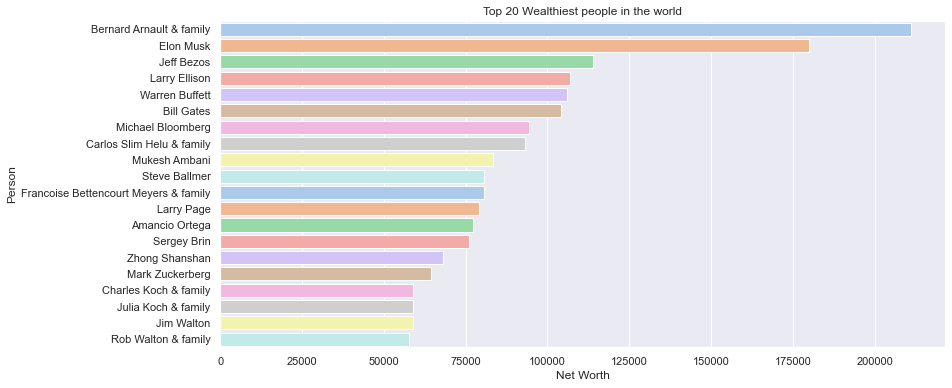

In [72]:
# display the first 20 wealthiest people

billionaire_20 = billionaire_df.head(20)
sns.set(rc={"figure.figsize":(13,6)})
sns.barplot(x=billionaire_20['finalWorth'],
            y=billionaire_20['personName'], 
            palette='pastel').set(title='Top 20 Wealthiest people in the world',
                                  xlabel="Net Worth", 
                                  ylabel="Person")

##### 2. Age Distribution for Billionaires
This section displays the billionaires distribution in the various age and countries represented

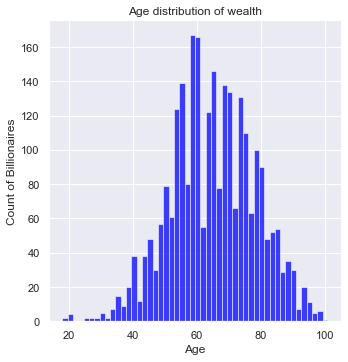

In [73]:
# display age distribution

# Plot the first graph in the first subplot
sns.displot(billionaire_df['age'],
            bins=50, color='blue').set(title='Age distribution of wealth', 
                                        xlabel="Age", 
                                        ylabel="Count of Billionaires")


In [74]:
# display industire count of wealth
country_df = billionaire_df[['countryOfCitizenship']].groupby('countryOfCitizenship').size().reset_index(name='counts')
country_df.sort_values('counts', inplace=True, ascending=True)

country_df

,countryOfCitizenship,counts
0,Algeria,1
74,Venezuela,1
67,Tanzania,1
63,St. Kitts and Nevis,1
54,Portugal,1
...,...,...
57,Russia,104
24,Germany,126
30,India,169
13,China,491


Text(0, 0.5, 'Country')

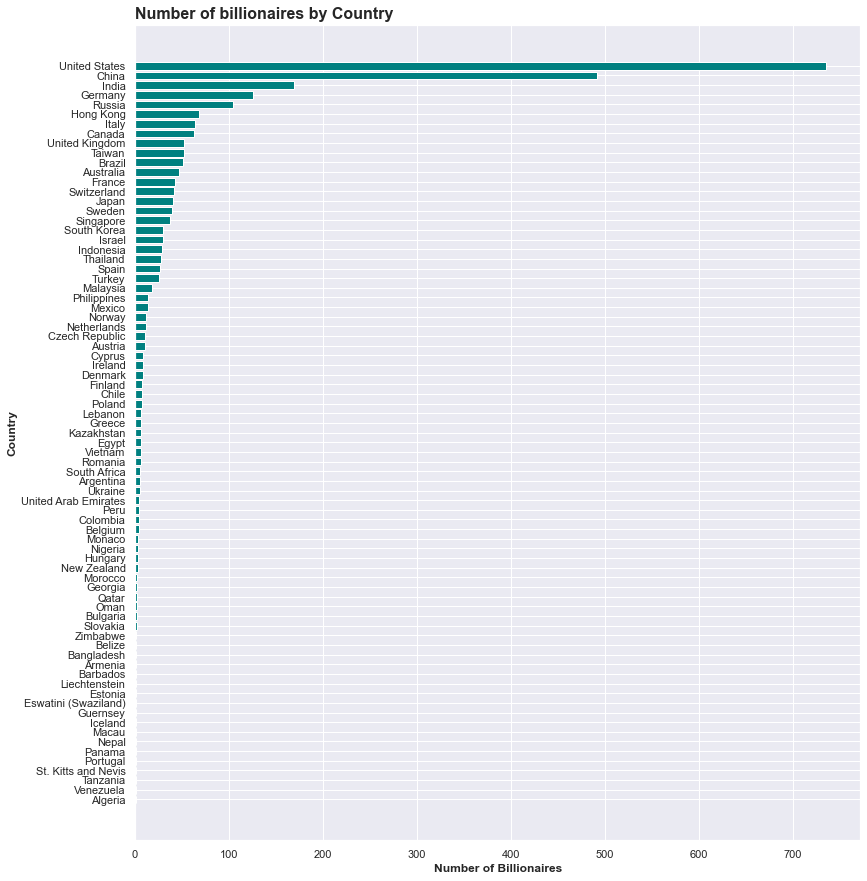

In [75]:
# display country vs billionaire

fig, ax = plt.subplots(figsize = (13,15))
ax.barh(country_df['countryOfCitizenship'], country_df['counts'], color='teal')
ax.set_title("Number of billionaires by Country", fontweight = "bold", fontsize=16, loc="left")
plt.xlabel("Number of Billionaires", fontweight = "bold", fontsize=12)
plt.ylabel("Country", fontweight = "bold", fontsize=12)

##### 3. Wealth Distribution Analysis

This should show the distribution of wealth in the various industires and sources

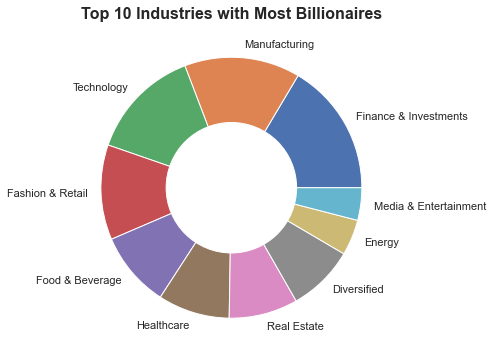

In [76]:
# display the top 10 industries with most number of billioonaires

industry = billionaire_df['industries'].value_counts().head(10)

index = industry.index
source = industry.values


plt.figure(figsize=(13,6))
plt.pie(source, labels=index)

central_circle = plt.Circle((0,0), 0.5, color="white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)

plt.title("Top 10 Industries with Most Billionaires", fontweight="bold", fontsize=16)

plt.show()
           

In [77]:
# display industire count of wealth
industry_df = billionaire_df[['industries']].groupby('industries').size().reset_index(name='counts')
industry_df.sort_values('counts', inplace=True, ascending=True)

industry_df

,industries,counts
7,Gambling & Casinos,25
17,Telecom,31
15,Sports,39
9,Logistics,40
1,Construction & Engineering,45
14,Service,53
0,Automotive,73
12,Metals & Mining,74
11,Media & Entertainment,91
3,Energy,100


Text(0, 0.5, 'Industry')

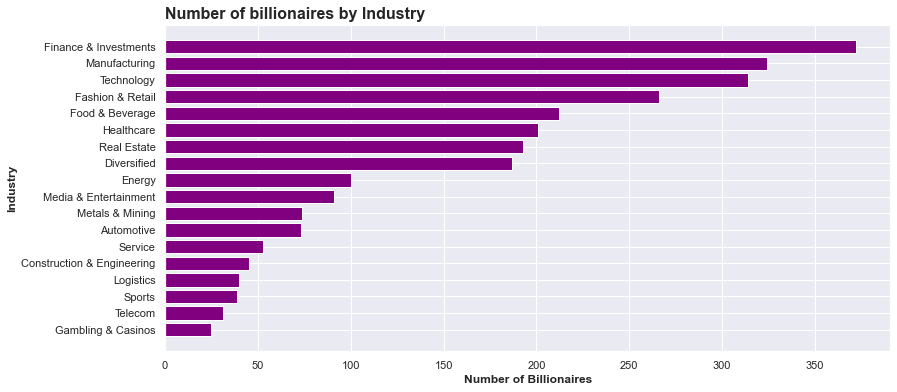

In [78]:
# display number billionaire vs industry

fig, ax = plt.subplots(figsize = (13,6))
ax.barh(industry_df['industries'], industry_df['counts'], color='purple')
ax.set_title("Number of billionaires by Industry", fontweight = "bold", fontsize=16, loc="left")
plt.xlabel("Number of Billionaires", fontweight = "bold", fontsize=12)
plt.ylabel("Industry", fontweight = "bold", fontsize=12)

Most profitable Sources of wealth

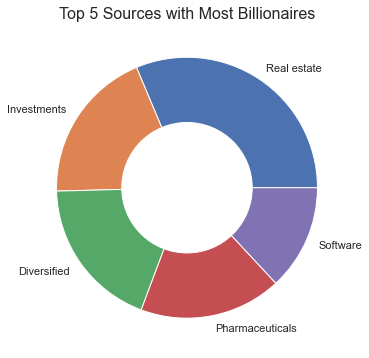

In [79]:
# display the top 10 industries with most number of billioonaires

sources = billionaire_df['source'].value_counts().head()

index = sources.index
source = sources.values
# print(source)    [151  92  91  85  63]
# print(index)
plt.figure(figsize=(13,6))
plt.pie(source, labels=index)

central_circle = plt.Circle((0,0), 0.5, color="white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)

plt.title("Top 5 Sources with Most Billionaires", fontsize=16)

plt.show()

##### 4. Self-made vs. inherited wealth
This should show the proportopn or distribution of the self-made billionaires and those who inherited wealth

[Text(0.5, 0, 'Status'),
 Text(0, 0.5, 'Worth'),
 Text(0.5, 1.0, 'Wealth, Self Made or Not?')]

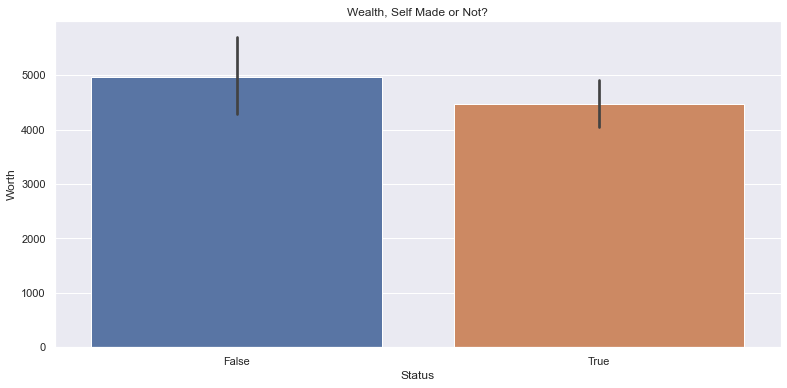

In [80]:
# self made billionaires vs those who inherited
plt.subplots(figsize=(13,6))
sns.barplot(x='selfMade', y='finalWorth', data=billionaire_df).set(xlabel="Status", ylabel="Worth", title="Wealth, Self Made or Not?" )


[Text(0.5, 0, 'Wealth Status'),
 Text(0, 0.5, 'Worth'),
 Text(0.5, 1.0, 'Wealth Status Distribution')]

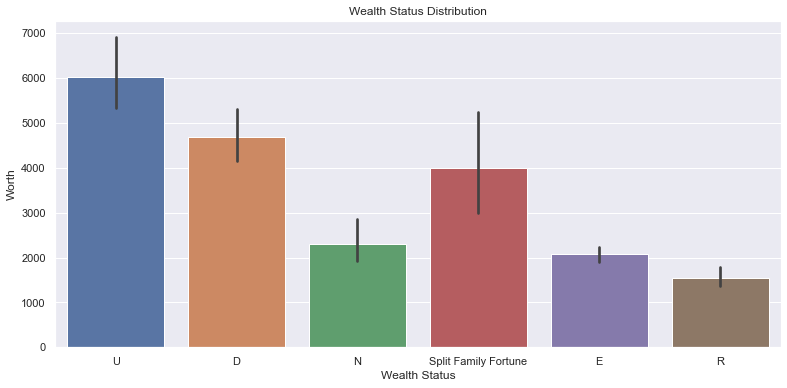

In [81]:
# self made billionaires vs those who inherited
plt.subplots(figsize=(13,6))
sns.barplot(x='status', y='finalWorth', data=billionaire_df).set(xlabel="Wealth Status", ylabel="Worth", title="Wealth Status Distribution" )


###### Determine what model to use

In [82]:
# define a pairplot visualization function

# sns.pairplot(billionaire_df)

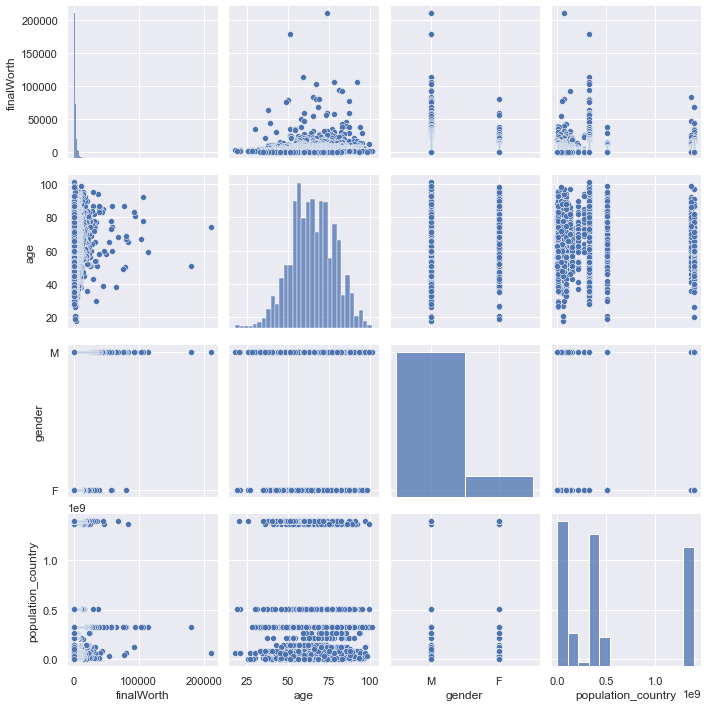

In [83]:
# demographic analysisi for wealth distribution
demo_df = billionaire_df[['finalWorth','age', 'gender', 'population_country']]

sns.pairplot(demo_df, vars=demo_df)
# demo_df.columns

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


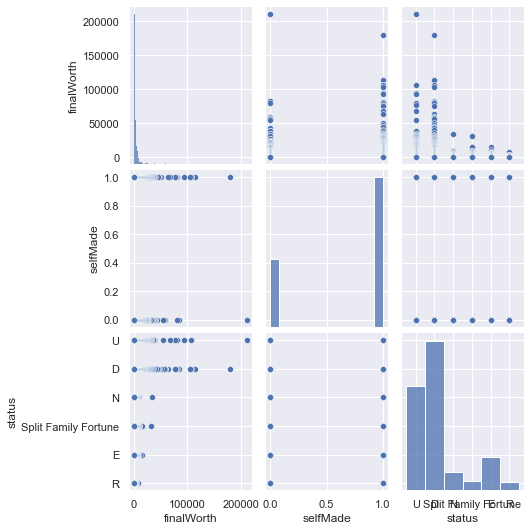

In [84]:
# self_made, status
status_df = billionaire_df[['finalWorth', 'selfMade', 'status']]

sns.pairplot(status_df, vars= status_df)
# status_df

Text(0.5, 1.0, 'Multi-Collinearity of Billionaire Features')

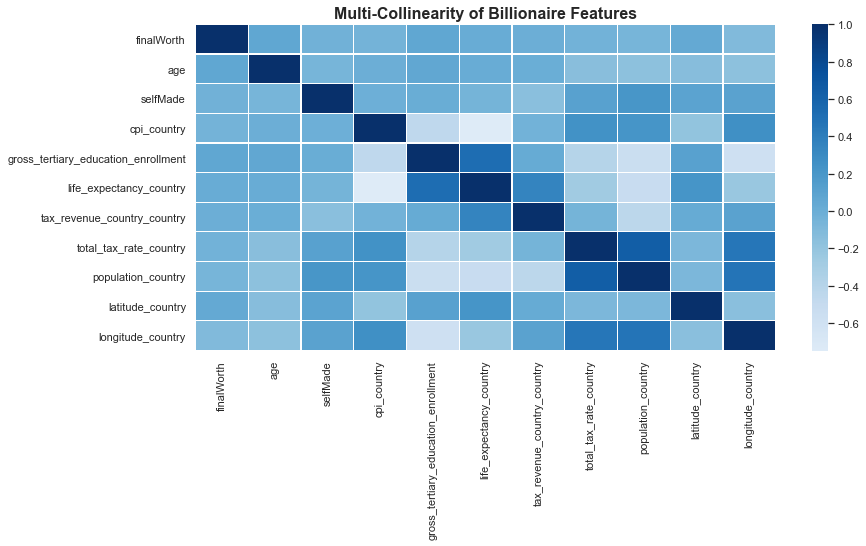

In [85]:
fig, ax = plt.subplots(figsize=(13,6)) 
sns.heatmap(billionaire_df.corr(), center=0, cmap='Blues', linecolor='white', linewidths=.1, cbar=True) 
ax.set_title('Multi-Collinearity of Billionaire Features', fontweight="bold", fontsize=16)


Text(0.5, 1.0, 'Multi-Collinearity of Billionaire Features')

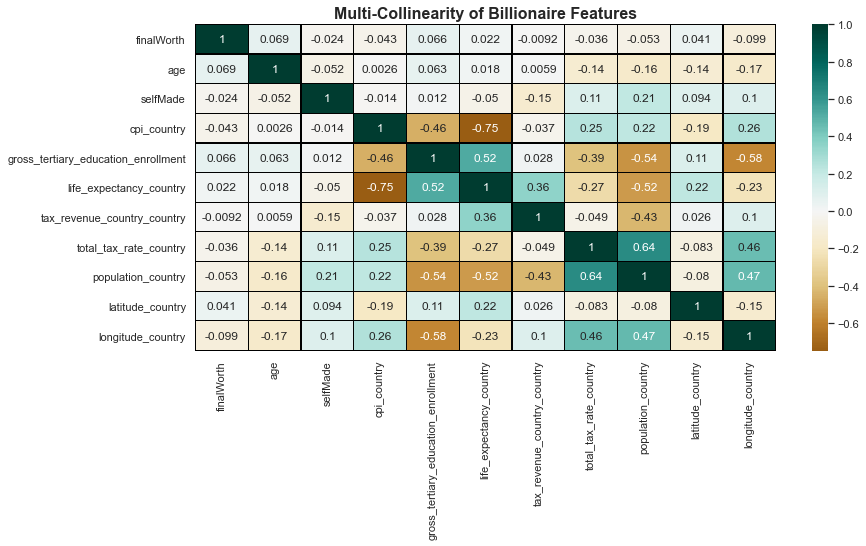

In [86]:

fig, ax = plt.subplots(figsize=(13,6)) 
sns.heatmap(billionaire_df.corr(), center=0, cmap='BrBG', annot=True, linecolor='black', linewidths=.1)
ax.set_title('Multi-Collinearity of Billionaire Features', fontweight="bold", fontsize=16)

Text(0.5, 1.0, 'Multi-Collinearity of Economic indicators')

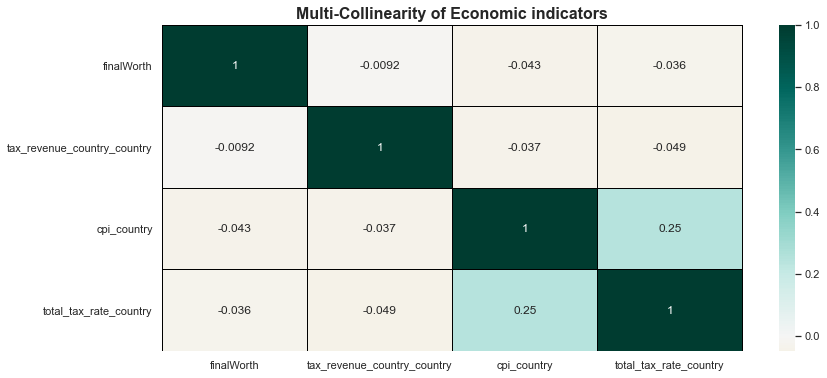

In [87]:
# correlations between wealth and ecocnomic indicators (CPI,TAX, GDP)

economic_df = billionaire_df[['finalWorth', 'tax_revenue_country_country','cpi_country', 'total_tax_rate_country']]
# economic_df.info()

# check for collinearity between the variables
fig, ax = plt.subplots(figsize=(13,6)) 
sns.heatmap(economic_df.corr(), center=0, cmap='BrBG', annot=True, linecolor='black', linewidths=.1)
ax.set_title('Multi-Collinearity of Economic indicators', fontweight="bold", fontsize=16)

## Modelling

### a. Wealth Classification
We can classify billionaires into different wealth categories such as "Low Net Worth," "Average Net Worth," and "High Net Worth."


1. Perform a Train-Test Split

This step is used to seperate the dataframe set into two sets (the X and y variables)

X variable contains all columns in the dataframe except the target

y variable contains the target variable

In [88]:
# 1. Data Splitting

# Define wealth status categories based on finalWorth
# # Define the bin edges
bins = 3
labels = ["Low Net Worth", "Mid Net Worth", "High Net Worth"]
data = billionaire_df['finalWorth']
billionaire_df['WealthStatus'] = pd.cut(data, bins, labels=labels, right=False, include_lowest=False, precision=3, duplicates='raise')

# print(billionaire_df['WealthStatus'])

In [89]:
# examine the distribution of the target var
print(billionaire_df['WealthStatus'].value_counts())

Low Net Worth     2626
Mid Net Worth       12
High Net Worth       2
Name: WealthStatus, dtype: int64



Bearing in mind that the training set is used to train the model whiel the test set is used to evaluate its performance, we allocate 40% of the data as the test-size as below.

In [90]:
# assign variables

X = billionaire_df.drop(columns=['personName', 'lastName','WealthStatus'], axis=1)
y = billionaire_df['WealthStatus']

In [91]:
# billionaire_df.columns
# print(X, y)

In [92]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

2. Preprocess Data

For our given dataset, we are required to encode the different columns we are dealing with from categorical values to numeric values
In this case, we will implement:

i.  One-Hot encoding technique to handle the different variable features

ii. LabelEncoder technique to handle the target variable

Encoding Categorical Variables

In [93]:
# convert the categorial variable to numeric values

from sklearn.preprocessing import OneHotEncoder
# one-hot encoder
features_encoder = OneHotEncoder(handle_unknown='ignore')

X_train_encoded = features_encoder.fit_transform(X)
X_test_encoded = features_encoder.fit_transform(X)

In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y)
y_test_encoded = encoder.fit_transform(y)

3. Model Fitting

In [95]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')

#Train the model
model.fit(X_train_encoded, y_train_encoded)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [96]:
# check for consistency
print(X_train_encoded.shape)
print(y_train_encoded.shape)

(2640, 1902)
(2640,)


4. Model Evaluation

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print({"Accuracy": accuracy,
       "Precision": precision,
       "Recall": recall,
       "f1_score": f1, 
       "confusion_matrix": conf_matrix})

{'Accuracy': 0.9950757575757576, 'Precision': 0.9943424391700253, 'Recall': 0.9950757575757576, 'f1_score': 0.9929402284957841, 'confusion_matrix': array([[   0,    2,    0],
       [   0, 2626,    0],
       [   0,   11,    1]], dtype=int64)}


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Non parametric and Ensembling Modelling

This section is used to prepare non parametric modelling solutions that will be used to compare with the logistic regression earlier modelled


In [43]:
# 1. Create a decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# Initialized DecisionTree
dt_classifier  = DecisionTreeClassifier(max_depth=3, min_samples_split=100, random_state = 42)

# 2. Train a decision tree classifier
dt_classifier.fit(X_train_encoded, y_train_encoded)

# 3. Make predictions
yd_pred = dt_classifier.predict(X_test_encoded)

4. Evaluate Model

In [44]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test_encoded, yd_pred)

print({'Accuracy': dt_accuracy})

{'Accuracy': 0.9958333333333333}


##### Model Intepreation
For the Wealth Classification as stipulated, we use Mulltinomial Logistic regression since we have the 3 types of classification we are handling for the target variable.

`Summary`:
1. Given that the `accuracy_score =  0.995` accuracy is high, it indicates that the model is good at predicting the Wealth Status.
2. The Precision is the ability of the classifier not to label as positive a sample that is negative. Given that our `precision_score = 0.994` precision is high, it means that the false positive rate is low.
3. Recall is the ability of the classifier to find all the positive samples. Given that our `recall_score = 0.995` recall is high, it means that the false negative rate is low.
4. The F1 Score `= 0.9929` is the harmonic mean of precision and recall. It is a good measure to use if you need to seek a balance between precision and recall.
5. The confusion matrix provides a summary of the performance of the classifier. From the given matrix array, the results show the number of true positive, true negative, false positive, and false negative predictions for each class.

### b. Industry Analysis


1. Perform a Train-Test Split

This step is used to seperate the dataframe set into two sets (the X and y variables)

`X variable`: contains all columns in the dataframe except the target

`y variable`: contains the target variable(industry)

In [45]:
# Assign variables
feat = billionaire_df.drop(columns=['industries'], axis=1)
ind = billionaire_df['industries']

In [46]:
# Data Splitting
from sklearn.model_selection import train_test_split

# Split the data
F_train, F_test, i_train, i_test = train_test_split(feat, ind, test_size=0.4, random_state=42)

2. Preprocess Data

For our given dataset, we are required to encode the different columns we are dealing with from categorical values to numeric values
In this case, we will implement:

`i.  One-Hot encoding technique` to handle the different variable features

`ii. LabelEncoder technique` to handle the target variable

Encoding Categorical Variables

In [47]:
# convert the categorial variable to numeric values

from sklearn.preprocessing import OneHotEncoder
# one-hot encoder
features_encoder = OneHotEncoder(handle_unknown='ignore')

F_train_encoded = features_encoder.fit_transform(feat)
F_test_encoded = features_encoder.fit_transform(feat)

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
i_train_encoded = encoder.fit_transform(ind)
i_test_encoded = encoder.fit_transform(ind)

 3. Model Training
 
 Train a logistic regression model on the training data.

In [49]:

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(F_train_encoded, i_train_encoded)


LogisticRegression(max_iter=5000, multi_class='multinomial')

4. Model Evaluation

Evaluate the performance of the model using the test data and suitable metrics (e.g., accuracy, precision, recall).

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = model.predict(F_test_encoded)

# Evaluate the model
accuracy = accuracy_score(i_test_encoded, y_pred)
precision = precision_score(i_test_encoded, y_pred, average='weighted')
recall = recall_score(i_test_encoded, y_pred, average='weighted')
f1 = f1_score(i_test_encoded, y_pred, average='weighted')

print({"Accuracy": accuracy,"Precision": precision,"Recall": recall,"f1_score": f1})

{'Accuracy': 0.9901515151515151, 'Precision': 0.9902334497830435, 'Recall': 0.9901515151515151, 'f1_score': 0.9901025143902531}


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


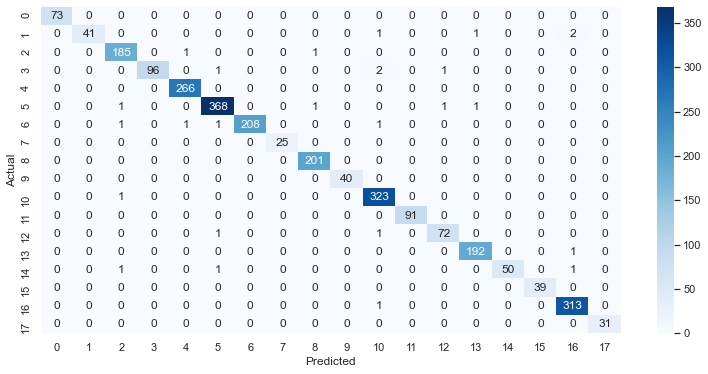

In [51]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Instantiate the model
model = LogisticRegression(random_state=42)

# Fit the model on the scaled data
model.fit(F_train_encoded, i_train_encoded)


yd_train_pred = model.predict(F_train_encoded)

# Display the confusion matrix
conf_mat = confusion_matrix( i_train_encoded, yd_train_pred)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Findings and Recommendations

#### Findings
1. From The age distribution analysis, Most Billionaires in the world lie in the age group bracket of 50 -60 years
2. The top five countries of citizenship for most billionaires include : United States, China, India, Germany, Russia
3. The top industry with most number of billionaires in the world are: Finance and Investments, Manufacturing, Technology, Fashion & Retail, Food & Beverage
4. The major sources of wealth include: Investments, Real Estate, Software, Pharmaceuticals
5. On the question on whether Most billionaire acquired their wealth themselves or Inherited, we have seen that most of them have inherited 


#### Recommendations
To the Research Agency, I would recommend investing in the Finance & Investments, Technolgy industries, as it shows potential of growing, not only for the younger generation but also the aging.
Also, 

## Conclusion
From the project above, we are able to see that the industry with a high number of wealth distributed is the Finance & Investments industry. Hence we are able to conclude that, based on the wealth age distribution, wealth is accumulated over the years, having best invested in the right industry.

The various logistic modelling, present an almost perfect accuracy score based on the variables indicated. The technologies used for this project include: Data Preparation, Exploratory Data Analysis methods, Data Modelling
